In [1]:
%matplotlib inline

In [2]:
import json
import pandas
import numpy
import datetime
import xray
import seaborn as sns

NTP_EPOCH = (datetime.date(1970, 1, 1) - datetime.date(1900, 1, 1)).total_seconds()

data = json.load(open('test_1000.json'))
df1000 = pandas.DataFrame.from_dict(data, orient='columns')
df1000['time'] = pandas.to_datetime(df1000.time - NTP_EPOCH, unit='s')
df1000.set_index('time', inplace=True)

data = json.load(open('test_9000.json'))
df9000 = pandas.DataFrame.from_dict(data, orient='columns')
df9000['time'] = pandas.to_datetime(df9000.time - NTP_EPOCH, unit='s')
df9000.set_index('time', inplace=True)

data = json.load(open('test_86400.json'))
df86400 = pandas.DataFrame.from_dict(data, orient='columns')
df86400['time'] = pandas.to_datetime(df86400.time - NTP_EPOCH, unit='s')
df86400.set_index('time', inplace=True)

I grabbed the data at several different levels of sampling (1000 pts, 9000 pts and 86400 pts) and plotted the data. There is definitely some loss of resolution in the stepping of the profiler at 1000 data points, but the overall motion of the profiler is still fairly well preserved.

Here's my plot which matches what you got from the UI:

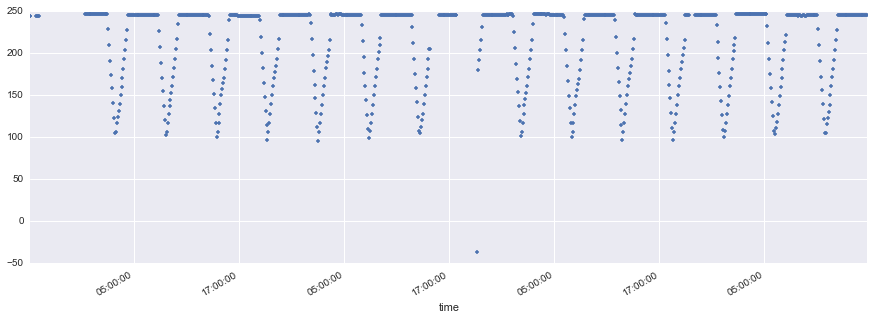

In [3]:
df1000.seawater_pressure.plot(figsize=(15,5), style='.')

And the same data at 86400 points (still sampled, but about 4:1 instead of 320:1):

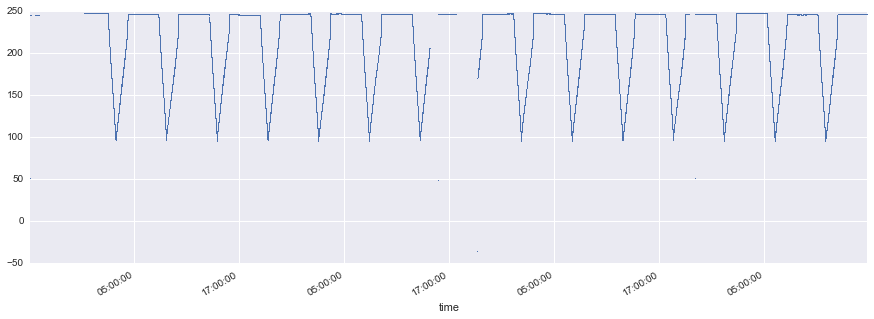

In [4]:
df86400.seawater_pressure.plot(figsize=(15,5), style=',')

It's pretty tough to see the stepping of the profiler with this many days worth of data, so here are some zoomed plots.

Here's 1000 points (in the full dataset, not this zoomed plot); steps are not visible, but overall motion is pretty clear:

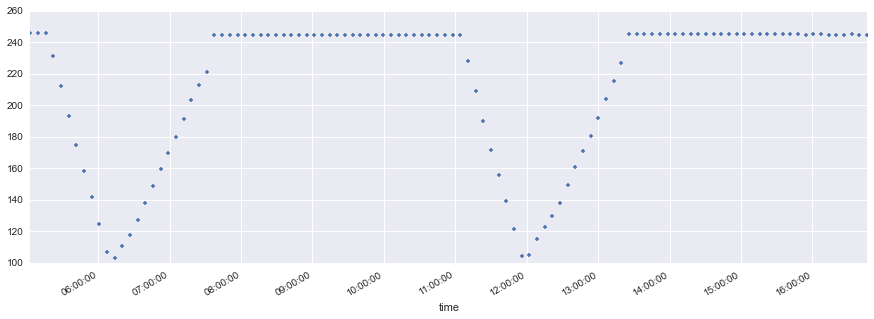

In [5]:
df1000.seawater_pressure[df1000.index>'2015-06-26 05:00:00.0'].plot(figsize=(15,5), style='.')

Here's 9000; steps are pretty well resolved here:

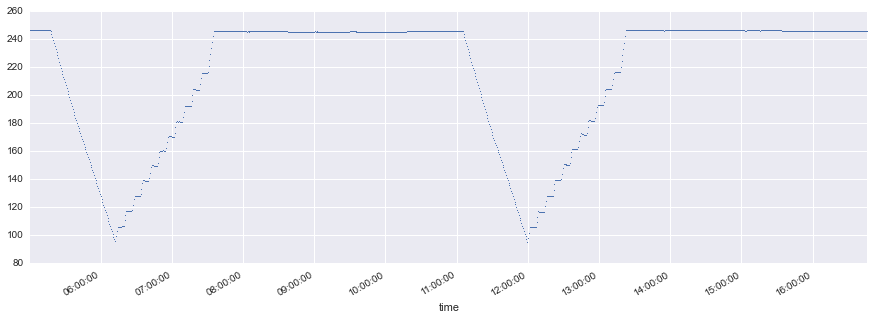

In [6]:
df9000.seawater_pressure[df9000.index>'2015-06-26 05:00:00.0'].plot(figsize=(15,5), style=',')

Here's 86400:

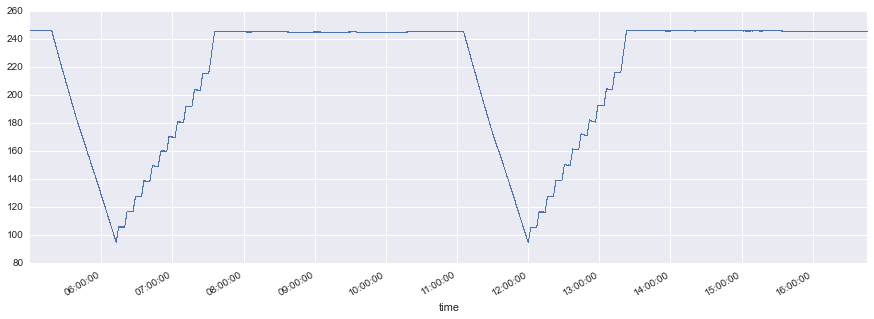

In [7]:
df86400.seawater_pressure[df86400.index>'2015-06-26 05:00:00.0'].plot(figsize=(15,5), style=',')

Here's the raw pressure at full resolution for a single day. The descent profiler steps are clear here:

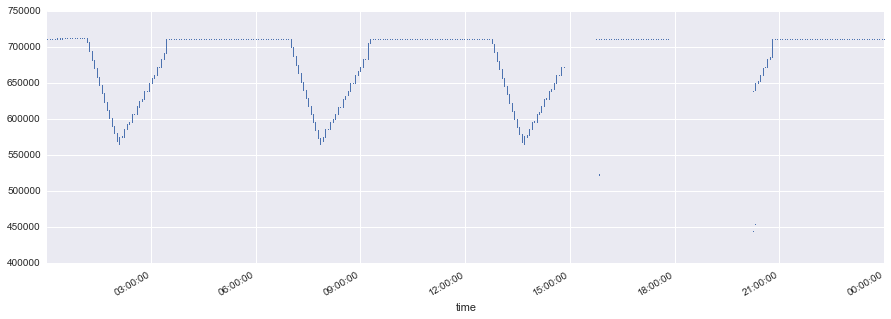

In [8]:
df = pandas.read_csv('data.txt', sep='|', dtype={'time': 'f64', 'pressure': 'int'})
df['time'] = pandas.to_datetime(df.time - NTP_EPOCH, unit='s')
df.set_index('time', inplace=True)
df.pressure.plot(figsize=(15,5), style=',')